# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [118]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [119]:
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


### Exploring Data

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [121]:
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [122]:
df['department'].value_counts()

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64

<AxesSubplot: xlabel='department', ylabel='count'>

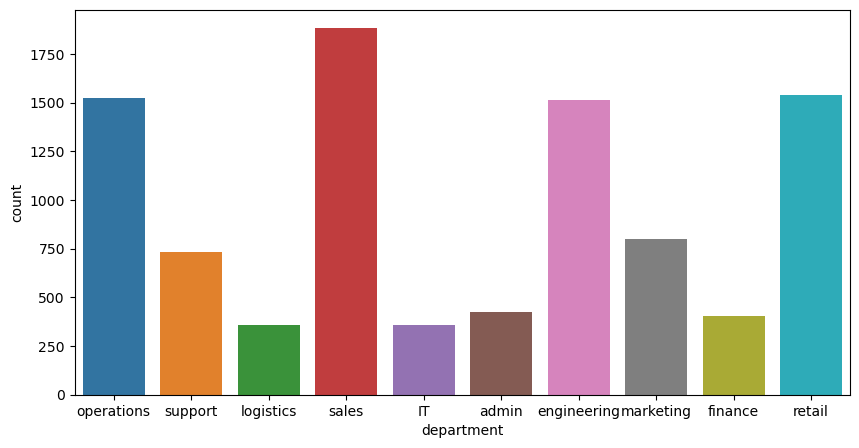

In [123]:
plt.figure(figsize=(10, 5))
sns.countplot(x='department', data=df)

## Data Visualizing

In [124]:
# Calculate summary statistics for each variable, such as mean and standard deviation
df.groupby('left').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
no,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
yes,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


<AxesSubplot: >

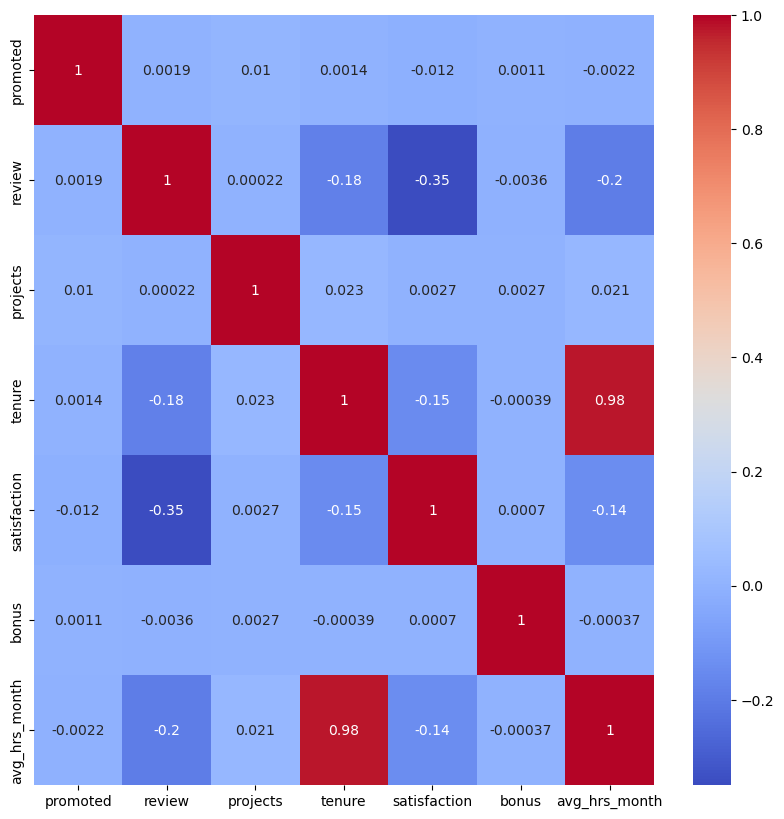

In [125]:
# Calculate the correlation matrix and plot it using seaborn
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='review', ylabel='Density'>

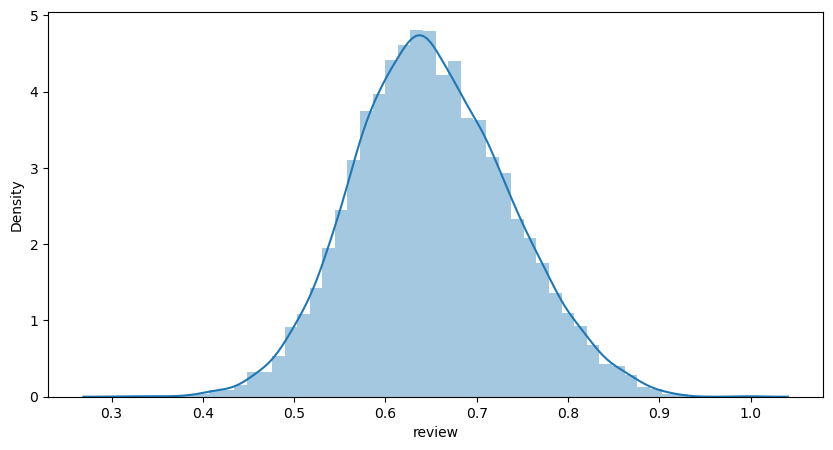

In [126]:
# Plot the distribution of the review variable
plt.figure(figsize=(10, 5))
sns.distplot(df['review'])

<AxesSubplot: xlabel='satisfaction', ylabel='Density'>

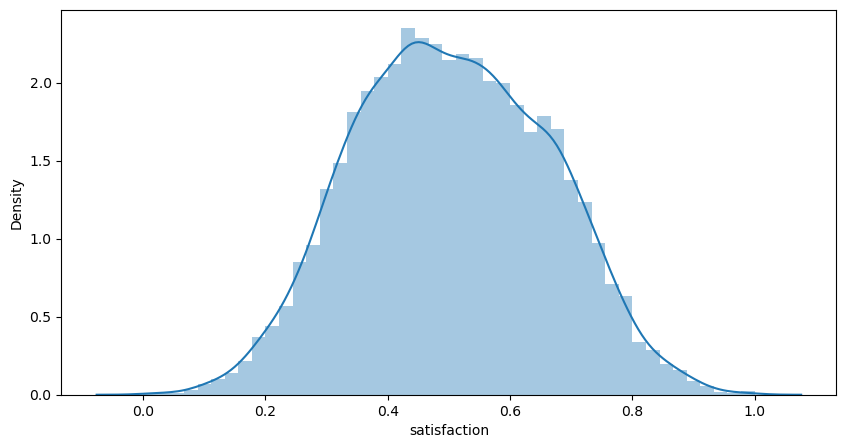

In [127]:
# Plot the distribution of the satisfaction variable
plt.figure(figsize=(10, 5))
sns.distplot(df['satisfaction'])

<AxesSubplot: xlabel='tenure', ylabel='Density'>

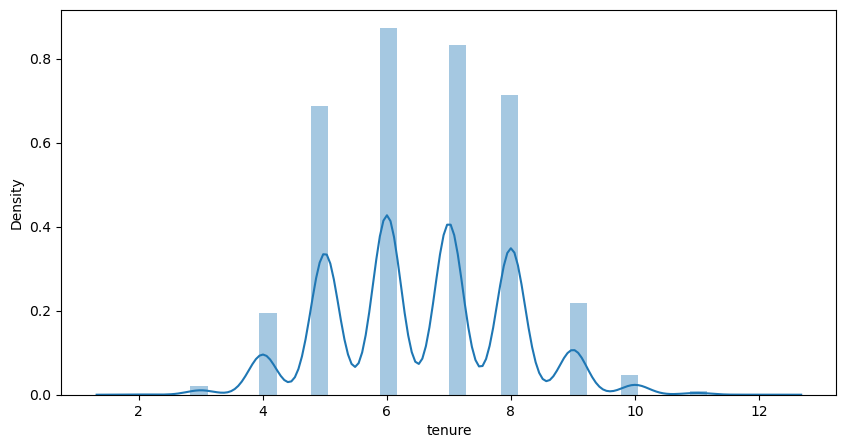

In [128]:
# Plot the distribution of the tenure variable
plt.figure(figsize=(10, 5))
sns.distplot(df['tenure'])

<AxesSubplot: xlabel='projects', ylabel='Density'>

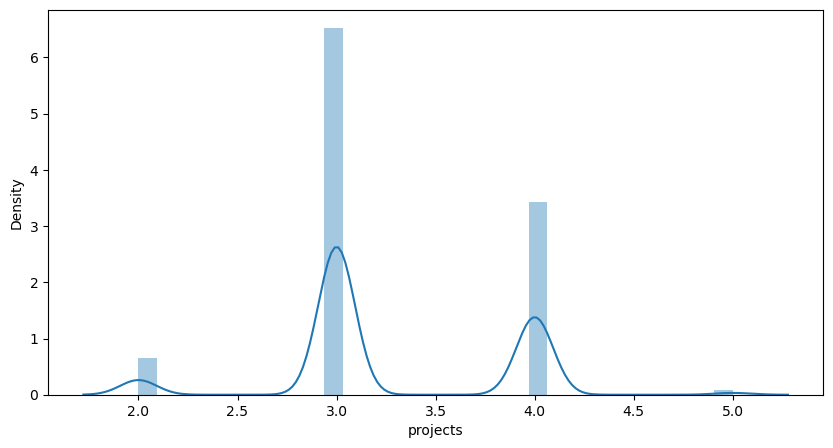

In [129]:
# Plot the distribution of the projects variable
plt.figure(figsize=(10, 5))
sns.distplot(df['projects'])


<AxesSubplot: xlabel='avg_hrs_month', ylabel='Density'>

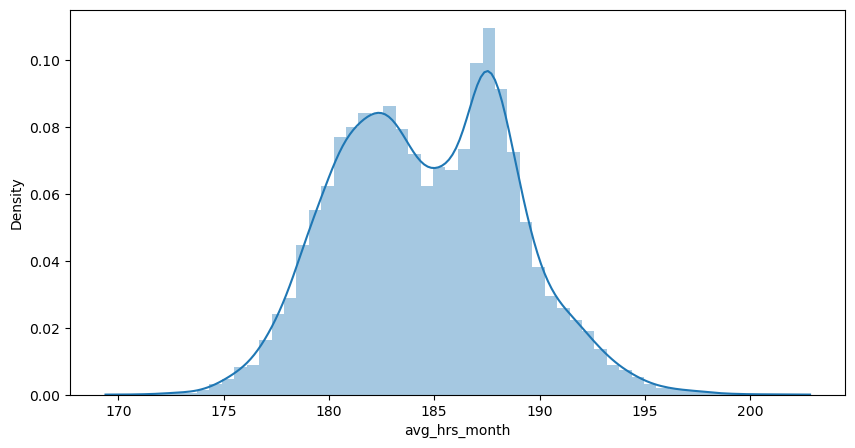

In [130]:
# Plot the distribution of the avg_hrs_month variable
plt.figure(figsize=(10, 5))
sns.distplot(df['avg_hrs_month'])

<AxesSubplot: xlabel='salary', ylabel='count'>

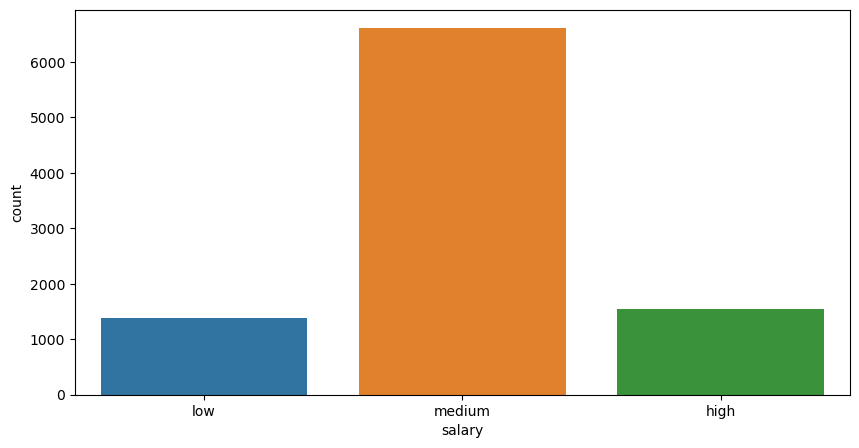

In [131]:
# Plot the distribution of the salary variable
plt.figure(figsize=(10, 5))
sns.countplot(x='salary', data=df)

<AxesSubplot: xlabel='salary', ylabel='count'>

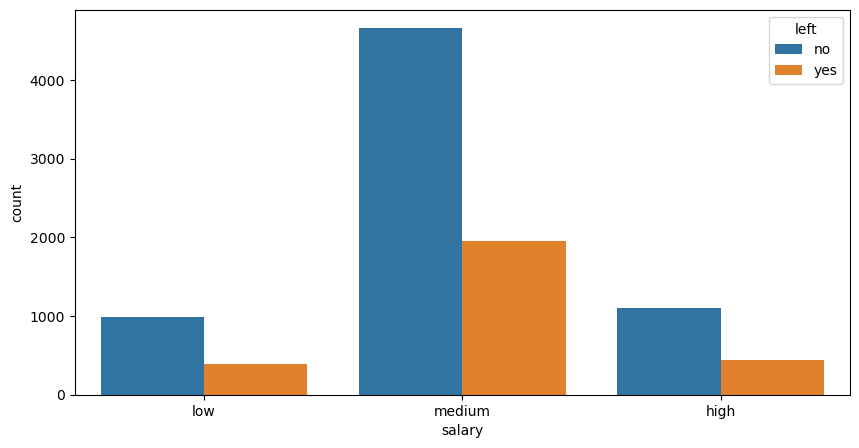

In [132]:
# Employee turnover rate by salary
plt.figure(figsize=(10, 5))
sns.countplot(x='salary', hue='left', data=df)


In [133]:
# turn over rate with respect to all employees for each salary level
df.groupby('salary')['left'].value_counts(normalize=True)

salary  left
high    no      0.714470
        yes     0.285530
low     no      0.716872
        yes     0.283128
medium  no      0.704886
        yes     0.295114
Name: left, dtype: float64

<AxesSubplot: xlabel='promoted', ylabel='count'>

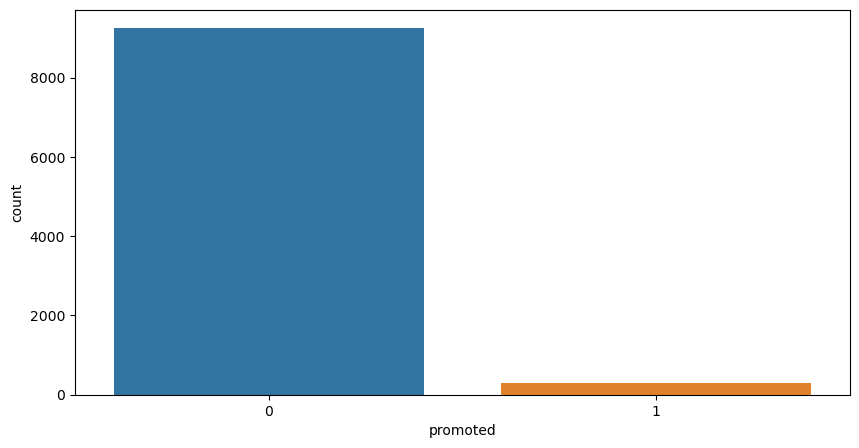

In [134]:
# Plot the distribution of the promoted variable
plt.figure(figsize=(10, 5))
sns.countplot(x='promoted', data=df)

<AxesSubplot: xlabel='promoted', ylabel='count'>

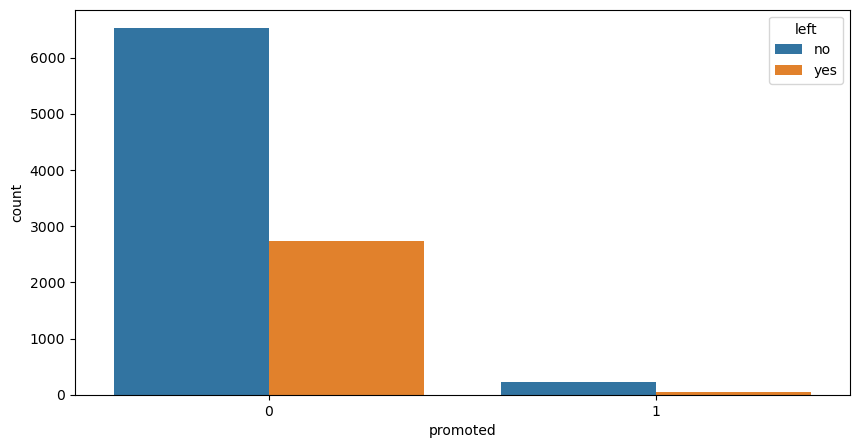

In [135]:
#Employee turnover rate by promotion
plt.figure(figsize=(10, 5))
sns.countplot(x='promoted', hue='left', data=df)

In [136]:
# turn over rate with respect to all employees for each promotion level
df.groupby('promoted')['left'].value_counts(normalize=True)

promoted  left
0         no      0.705221
          yes     0.294779
1         no      0.802768
          yes     0.197232
Name: left, dtype: float64

<AxesSubplot: xlabel='department', ylabel='count'>

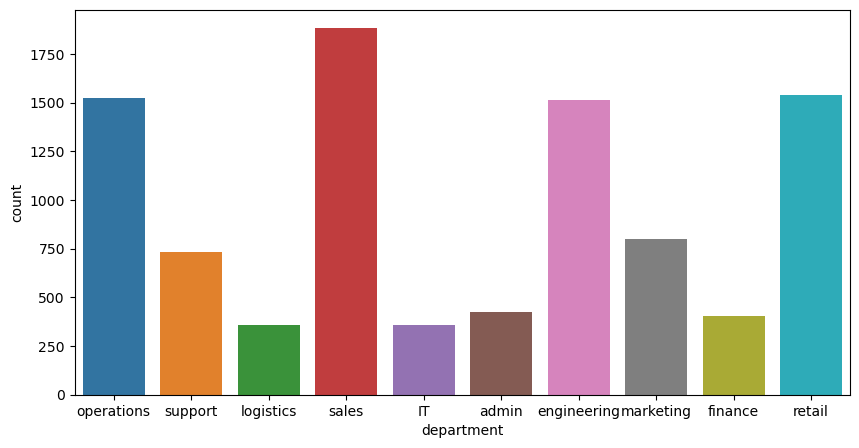

In [137]:
# Plot the distribution of the department variable
plt.figure(figsize=(10, 5))
sns.countplot(x='department', data=df)

<AxesSubplot: xlabel='department', ylabel='count'>

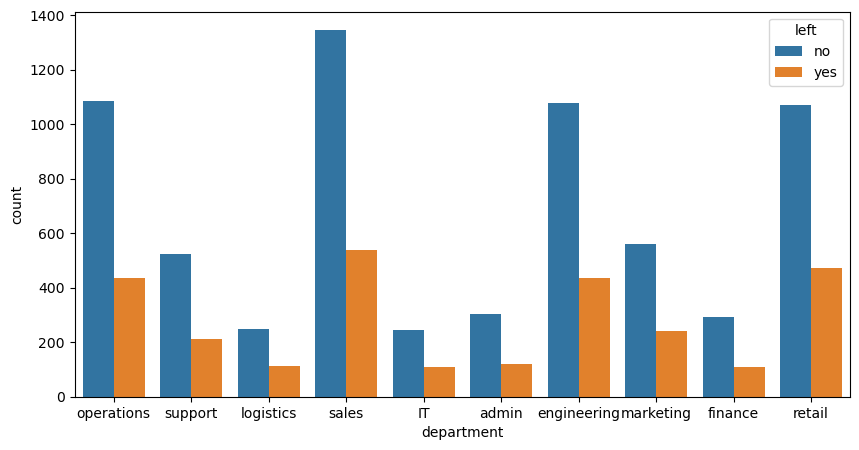

In [138]:
# Employee turnover rate by department
plt.figure(figsize=(10, 5))
sns.countplot(x='department', hue='left', data=df)


In [139]:
# turn over rate with respect to all employees for each department
df.groupby('department')['left'].value_counts(normalize=True)

department   left
IT           no      0.691011
             yes     0.308989
admin        no      0.718676
             yes     0.281324
engineering  no      0.711741
             yes     0.288259
finance      no      0.731343
             yes     0.268657
logistics    no      0.691667
             yes     0.308333
marketing    no      0.697007
             yes     0.302993
operations   no      0.713535
             yes     0.286465
retail       no      0.694354
             yes     0.305646
sales        no      0.714817
             yes     0.285183
support      no      0.711565
             yes     0.288435
Name: left, dtype: float64

In [140]:
df_grouped_department = df.groupby('department')
# Count the number of employees who have "left" with value "yes" in each group
department_turnover = df_grouped_department["left"].apply(lambda x: (x == "yes").sum())

# Find the department with the highest and lowest employee turnover
highest_turnover_department = department_turnover.idxmax()
lowest_turnover_department = department_turnover.idxmin()

# Print the results
print("Department with highest employee turnover:", highest_turnover_department)
print("Department with lowest employee turnover:", lowest_turnover_department)

Department with highest employee turnover: sales
Department with lowest employee turnover: finance


In [141]:
# explore employees at the finance department
df_finance = df[df['department'] == 'finance']
df_finance.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
15,finance,0,0.582651,3,medium,6.0,0.608027,0,184.029011,no
70,finance,0,0.606415,3,medium,5.0,0.623611,0,180.534715,no
90,finance,0,0.756007,4,medium,5.0,0.570239,1,180.024182,no
111,finance,0,0.691052,3,medium,6.0,0.492389,0,181.916976,no
142,finance,0,0.646466,3,medium,5.0,0.642770,0,180.413538,no


<AxesSubplot: xlabel='review', ylabel='Density'>

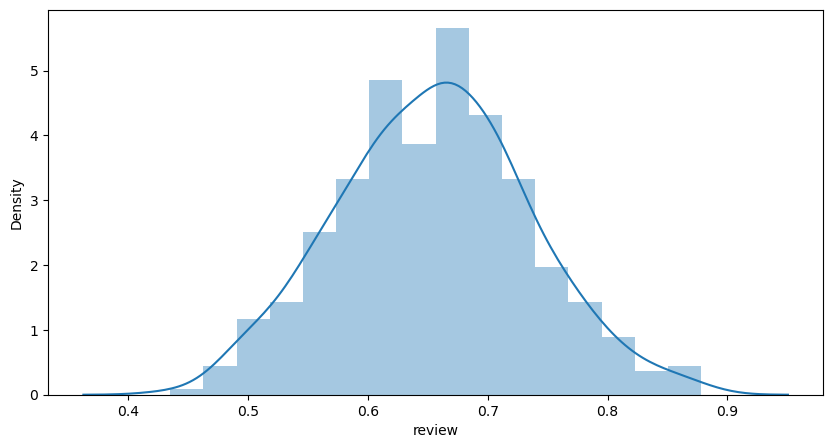

In [142]:
# Plot the distribution of the review variable
plt.figure(figsize=(10, 5))
sns.distplot(df_finance['review'])

<AxesSubplot: xlabel='satisfaction', ylabel='Density'>

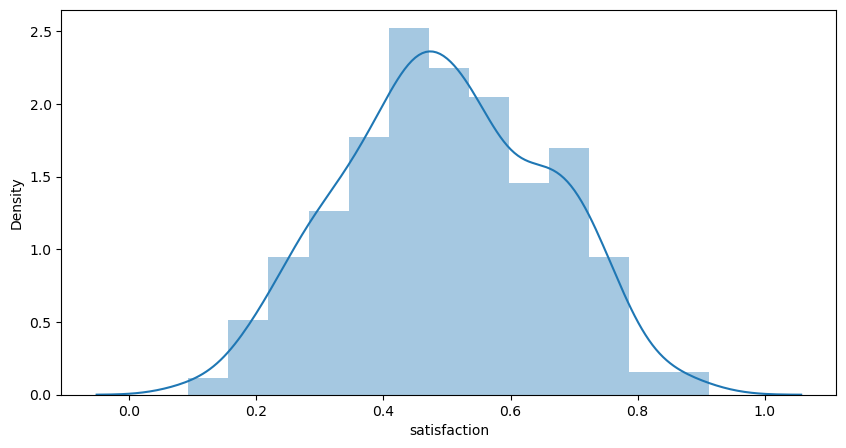

In [143]:
# Plot the distribution of the satisfaction variable
plt.figure(figsize=(10, 5))
sns.distplot(df_finance['satisfaction'])

<AxesSubplot: xlabel='tenure', ylabel='Density'>

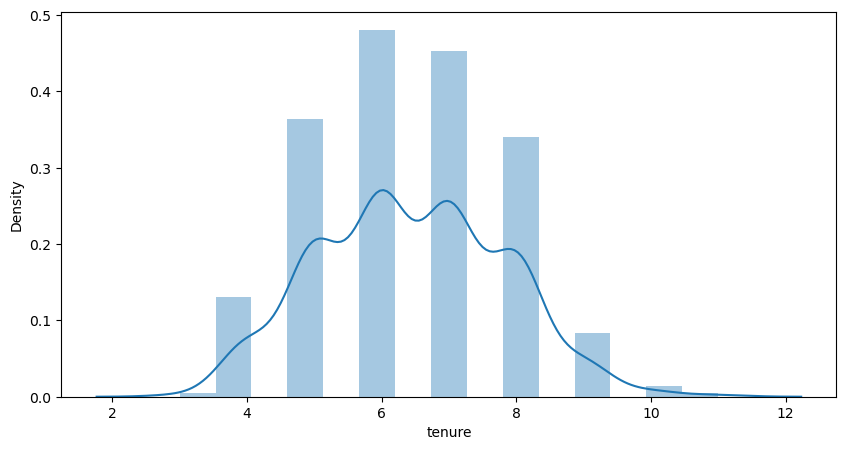

In [144]:
# Plot the distribution of the tenure variable
plt.figure(figsize=(10, 5))
sns.distplot(df_finance['tenure'])

<AxesSubplot: xlabel='salary', ylabel='count'>

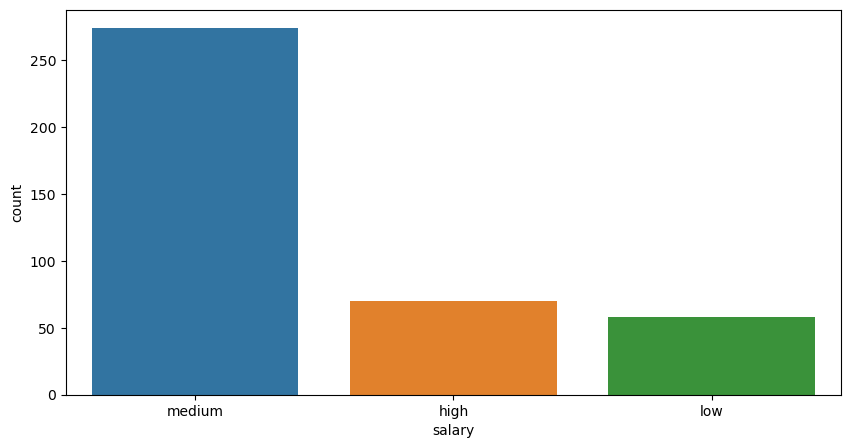

In [145]:
# Plot the distribution of the salary variable
plt.figure(figsize=(10, 5))
sns.countplot(x='salary', data=df_finance)

In [146]:
# Compare the promotion rate of employees in the finance department with the overall promotion rate
df_finance_promoted = df_finance[df_finance['promoted'] == 1]
df_promoted = df[df['promoted'] == 1]

print("Promotion rate of employees in the finance department:", len(df_finance_promoted) / len(df_finance))
print("Overall promotion rate:", len(df_promoted) / len(df))



Promotion rate of employees in the finance department: 0.0472636815920398
Overall promotion rate: 0.03029350104821803


In [154]:
# compare the average satisfaction level of employees in the finance department with the overall average satisfaction level
print("Average satisfaction level of employees in the finance department:", df_finance['satisfaction'].mean())
print("Overall average satisfaction level:", df['satisfaction'].mean())

Average satisfaction level of employees in the finance department: 0.49718326364457377
Overall average satisfaction level: 0.5046445122303351


In [156]:
# Compare the promotion rate of the employees in the sales department with the overall promotion rate
df_sales = df[df['department'] == 'sales']
df_sales_promoted = df_sales[df_sales['promoted'] == 1]

print("Promotion rate of employees in the sales department:", len(df_sales_promoted) / len(df_sales))
print("Overall promotion rate:", len(df_promoted) / len(df))

Promotion rate of employees in the sales department: 0.026553372278279343
Overall promotion rate: 0.03029350104821803


## Feature Importance

In [147]:
# convert left column to 0 and 1
df['left'] = df['left'].apply(lambda x: 1 if x == 'yes' else 0)

In [148]:
# Separate the features and the target
X = df.drop('left', axis=1)
y = df['left']

In [149]:
# Encode the categorical variables
X = pd.get_dummies(X, drop_first=True)
X

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_low,salary_medium
0,0,0.577569,3,5.0,0.626759,0,180.866070,0,0,0,0,0,1,0,0,0,1,0
1,0,0.751900,3,6.0,0.443679,0,182.708149,0,0,0,0,0,1,0,0,0,0,1
2,0,0.722548,3,6.0,0.446823,0,184.416084,0,0,0,0,0,0,0,0,1,0,1
3,0,0.675158,4,8.0,0.440139,0,188.707545,0,0,0,1,0,0,0,0,0,0,0
4,0,0.676203,3,5.0,0.577607,1,179.821083,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,0.610988,4,8.0,0.543641,0,188.155738,0,0,0,0,0,1,0,0,0,0,1
9536,0,0.746887,3,8.0,0.549048,0,188.176164,0,0,0,1,0,0,0,0,0,0,1
9537,0,0.557980,3,7.0,0.705425,0,186.531008,0,0,0,0,0,1,0,0,0,1,0
9538,0,0.584446,4,8.0,0.607287,1,187.641370,0,0,0,0,0,0,0,0,0,0,1


In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8574423480083857

In [153]:
# Get the feature importance
feature_importance = model.feature_importances_
# Create a dataframe with the feature importance
feature_importance_df = pd.DataFrame({'feature': list(X.columns), 'feature_importance': feature_importance})
# Sort the dataframe by feature importance
feature_importance_df = feature_importance_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)
# Print the dataframe
feature_importance_df

,feature,feature_importance
0,satisfaction,0.282860
1,avg_hrs_month,0.256316
2,review,0.255228
3,tenure,0.085111
4,projects,0.023701
5,bonus,0.012960
6,salary_medium,0.011664
7,department_engineering,0.008852
8,department_sales,0.008397
9,department_retail,0.008321


### Conclusion
The most important turnover predictors seem to be the variables `Review` , `Satisfaction` and `Average Working Hours per month` , since they present the highest coefficients amongst all features.
Furthermore, this information reveals that high performance employees are more likely to leave the company. What can be done to foment talent retention?

## 1. Which department has the highest employee turnover? Which one has the lowest?
The department with the highest employee turnover in absolute values is the sales department with 537 from 1883 employees leaving the company (28.52%) and the one with the lowest is the Finance department with 26.87% (108 from 402 employees).

In relative frequency terms and the highest employee turnover rate was registered in the IT department with 30.9% (110 of 356 staff members left).

Some notorious differences between these departments reside in the fact that employees that make part of the Finance section tend to receive more promotions and bonuses in average, comparing to the staff members in other departments.

In contrast with this case, the It staff that are the ones who are less likely to get a promotion and also have little chances on receiving a bonus even though they're the ones who average the highest number of years at the company and hours of work.



## 2.Which variables seem to be better predictors of employee departure.

After using RandomForestClassification in the data with the intent of extract the variables coefficients, since it provide the basis for a crude feature importance score.
It was possible to observe that the variable with most influence on predicting who will leave the company is Satisfaction,
which can imply that even though the employees might like the work environment, they'll still leave the company regardless.


Also, the second-best predictor is Review,this means that high performance employees are finding better conditions somewhere and that this company needs to develop career progression strategies and other talent retention systems, so it doesn't keep losing its best workforce.

This can be explained by the fact that the company is not providing enough incentives to keep them working there.

Finally, the third-best predictor is the average working hours per month, which can be explained by the fact that employees who work more hours are more likely to leave the company, since they're probably overworked and not being compensated for it.



## 3. What recommendations would you make regarding ways to reduce employee turnover?
Organizations generally aim for 10% for an employee turnover rate, but the majority fall into the range between 12% and 20%. The company under this study presented an abnormal turnover rate, rounding 30% of its total workforce. Some specific industries reveal higher rates, but in this case, this information is not revealed.

The main cause of this problem seems to be the lack of a meritocracy system, in a sense that they're losing their most valuable employees because they're not rewarding them for their work. The company's anual promotions rate is at 3% and bonus rate at 20%, their employees with better performance seem to be unsatisfied with their professional progress/position at the company, causing them to depart.

I suggest the company to take different strategies for the different clusters of employees. To the Unsatisfied staff members, which presented the highest performance metrics, the company should take talent retention actions like promoting career progression opportunities, sharing the decision-making with adequate personnel, implementing a reward productivity system with bonuses and/or gifts and raising the salaries of those who deserve it.

For the Long-Term segment, since they´re the most tenured ones, they should provide the most experienced employees with leadership opportunities, increased benefits like reduced labor time (the opposite of what's happening), higher salaries and/or bonuses, etc... and an anual salary raise between 10% and 20% to incentive the employers to stay, because usually that's the average raise an employee receives for leaving according to Forbes.

Forbes article

For the Satisfied segment, the company should invest on understanding in more detail why they are leaving (21.01% turnover rate) by doing interviews, because according to the satisfaction surveys, they're happy there. Asking questions to those who leave, will expose their point of view and create understanding on the details of what they're doing wrong or not doing. I believe the interview before the employee leave the company should be applied to all segments nevertheless.

The company has to invest to resolve this situation, because having almost 30% of general employee turnover rate causes instability in the company and might influentiate or encourage others to do so.